In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(123)

url = 'https://raw.githubusercontent.com/ow-hash/portfolio/main/California%20Housing.csv?token=GHSAT0AAAAAACQCFGRM5WB3WDBI34ZJDOI4ZQCMJDA'
data = pd.read_csv(url)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**Check the data.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**No null value.**

**Change to data types to Float32 and Category.**

In [ ]:
num_col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for i in num_col:
  data[i] = data[i].astype(np.float32)

In [ ]:
data['ocean_proximity'] = data['ocean_proximity'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float32 
 1   latitude            20640 non-null  float32 
 2   housing_median_age  20640 non-null  float32 
 3   total_rooms         20640 non-null  float32 
 4   total_bedrooms      20433 non-null  float32 
 5   population          20640 non-null  float32 
 6   households          20640 non-null  float32 
 7   median_income       20640 non-null  float32 
 8   median_house_value  20640 non-null  float32 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float32(9)
memory usage: 746.1 KB


In [ ]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

**Split the data first to avoid data leakage.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
df_test = pd.concat([X_test,y_test], axis = 1)

In [ ]:
df_train = pd.concat([X_train,y_train], axis = 1)

In [ ]:
df_train.shape

(16512, 10)

**Plot to check label.**

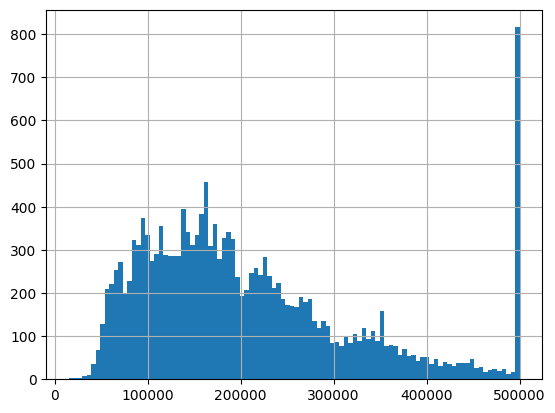

In [ ]:
df_train['median_house_value'].hist(bins = 100)
plt.show()

**Observes outlier problem and skewed data.**

**Explore Longitude and Latitude.**

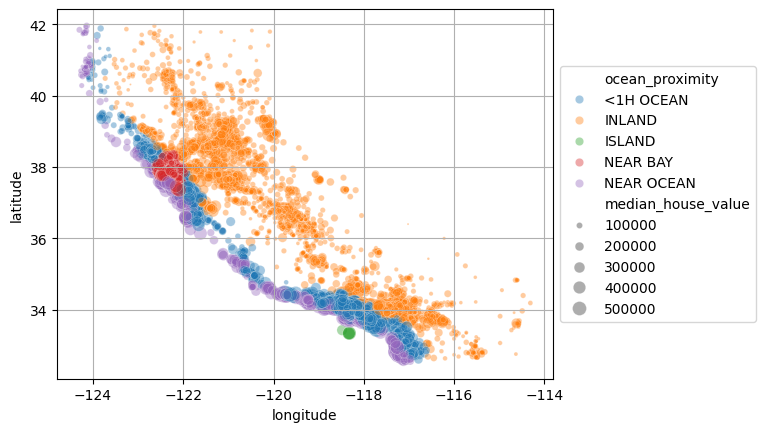

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.grid(True)
sns.scatterplot(data=df_train, x='longitude', y='latitude', alpha = 0.4, hue='ocean_proximity', size='median_house_value', sizes=(2, 100))
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**The left side of the map might represent the ocean.**

**Plot to see it.**

In [ ]:
#pip install basemap

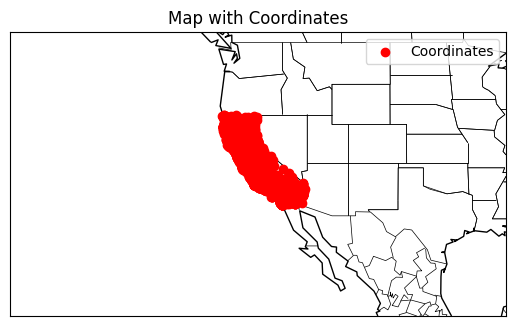

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def plot_coordinates(latitude, longitude, title="Map with Coordinates"):
    m = Basemap(projection='mill', llcrnrlat=20, urcrnrlat=50, \
                llcrnrlon=-150, urcrnrlon=-90, resolution='c')

    x, y = m(longitude, latitude)
    m.scatter(x, y, marker='o', color='red', zorder=5, label='Coordinates')

    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    plt.title(title)
    plt.legend()

    plt.show()

latitude = df_train['latitude']
longitude = df_train['longitude']

plot_coordinates(latitude, longitude)

**The reason for the high median house price is that the houses are near the ocean.**

**Check the distribution of the X variable.**

In [ ]:
plot_hist = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

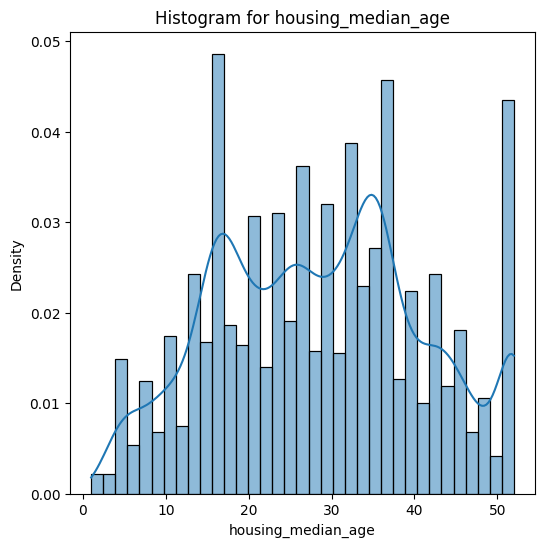

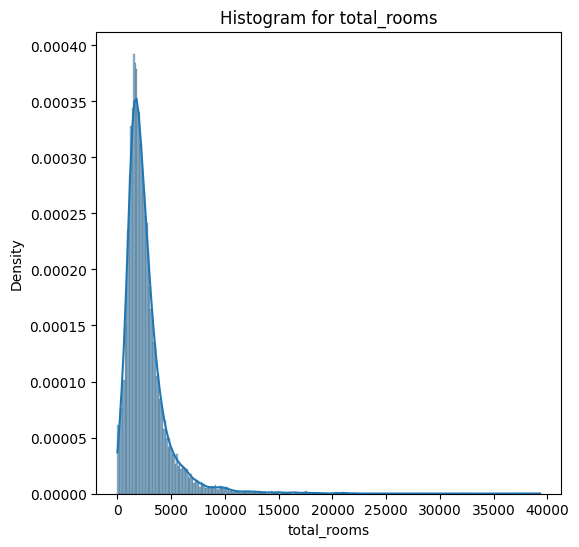

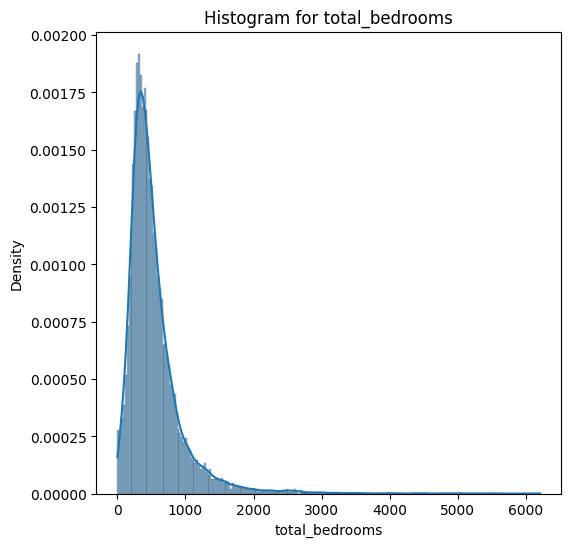

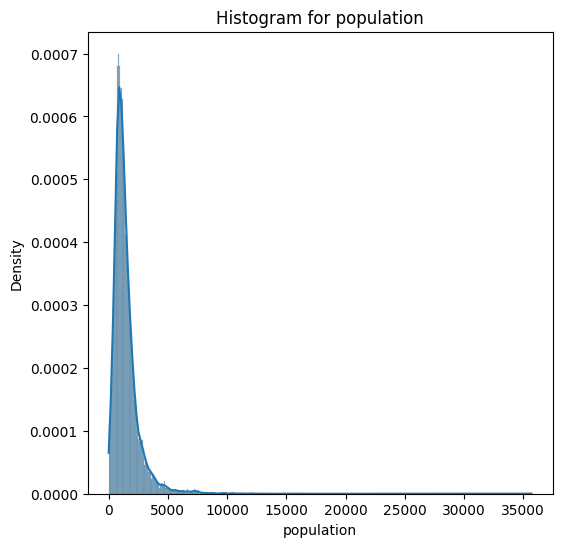

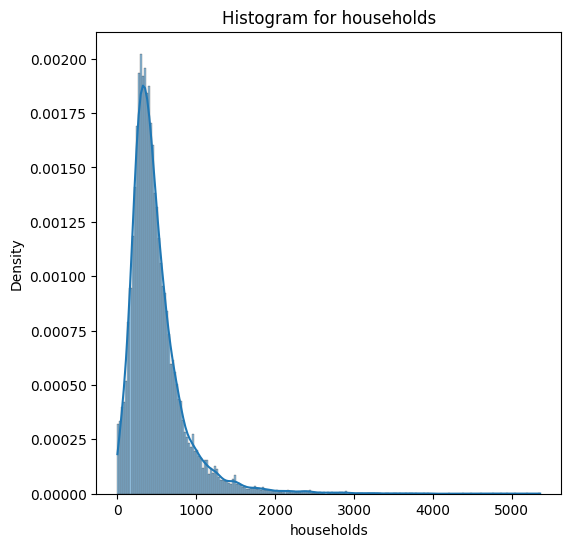

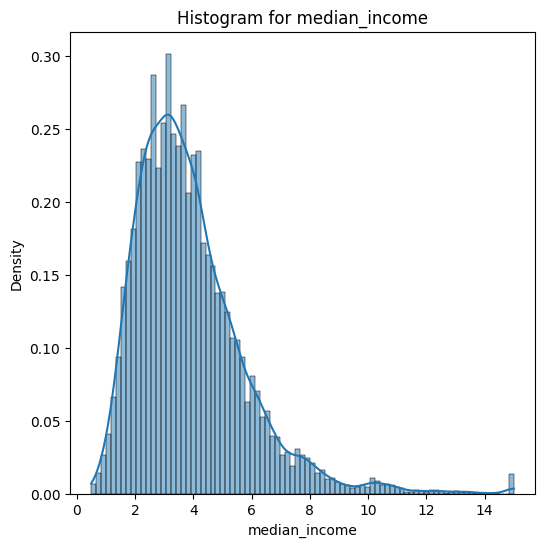

In [ ]:
import matplotlib.pyplot as plt

for i in plot_hist:
  plt.figure(figsize=(6,6))
  sns.histplot(df_train, x=i, kde=True, stat='density', common_norm=False)
  plt.title(f'Histogram for {i}')
  plt.show()

**Based on the distribution of the data, it is necessary to perform data transformation.**

**Check the correlation of each numeric variable in the X data.**

In [ ]:
plot_scatter = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

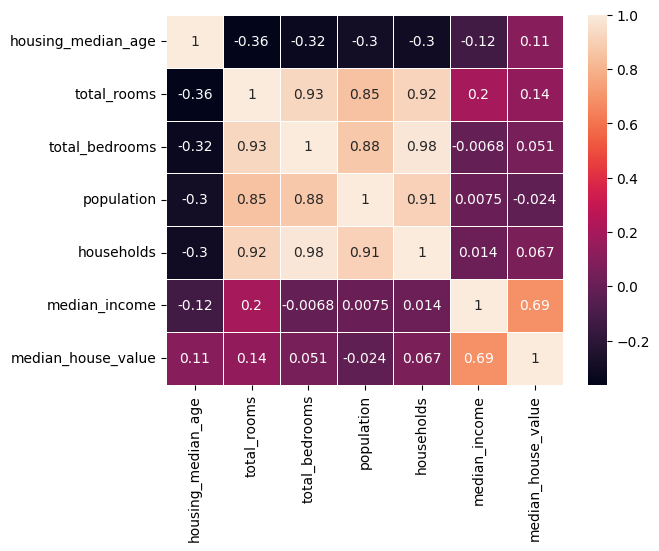

In [ ]:
sns.heatmap(df_train[plot_scatter].corr(), annot=True, linewidths=.5)
plt.show()

**Some variables, such as total rooms, total bedrooms, population, and households, have a strong correlation.**

**The correlation may not be entirely clear, check the data using a scatter plot.**

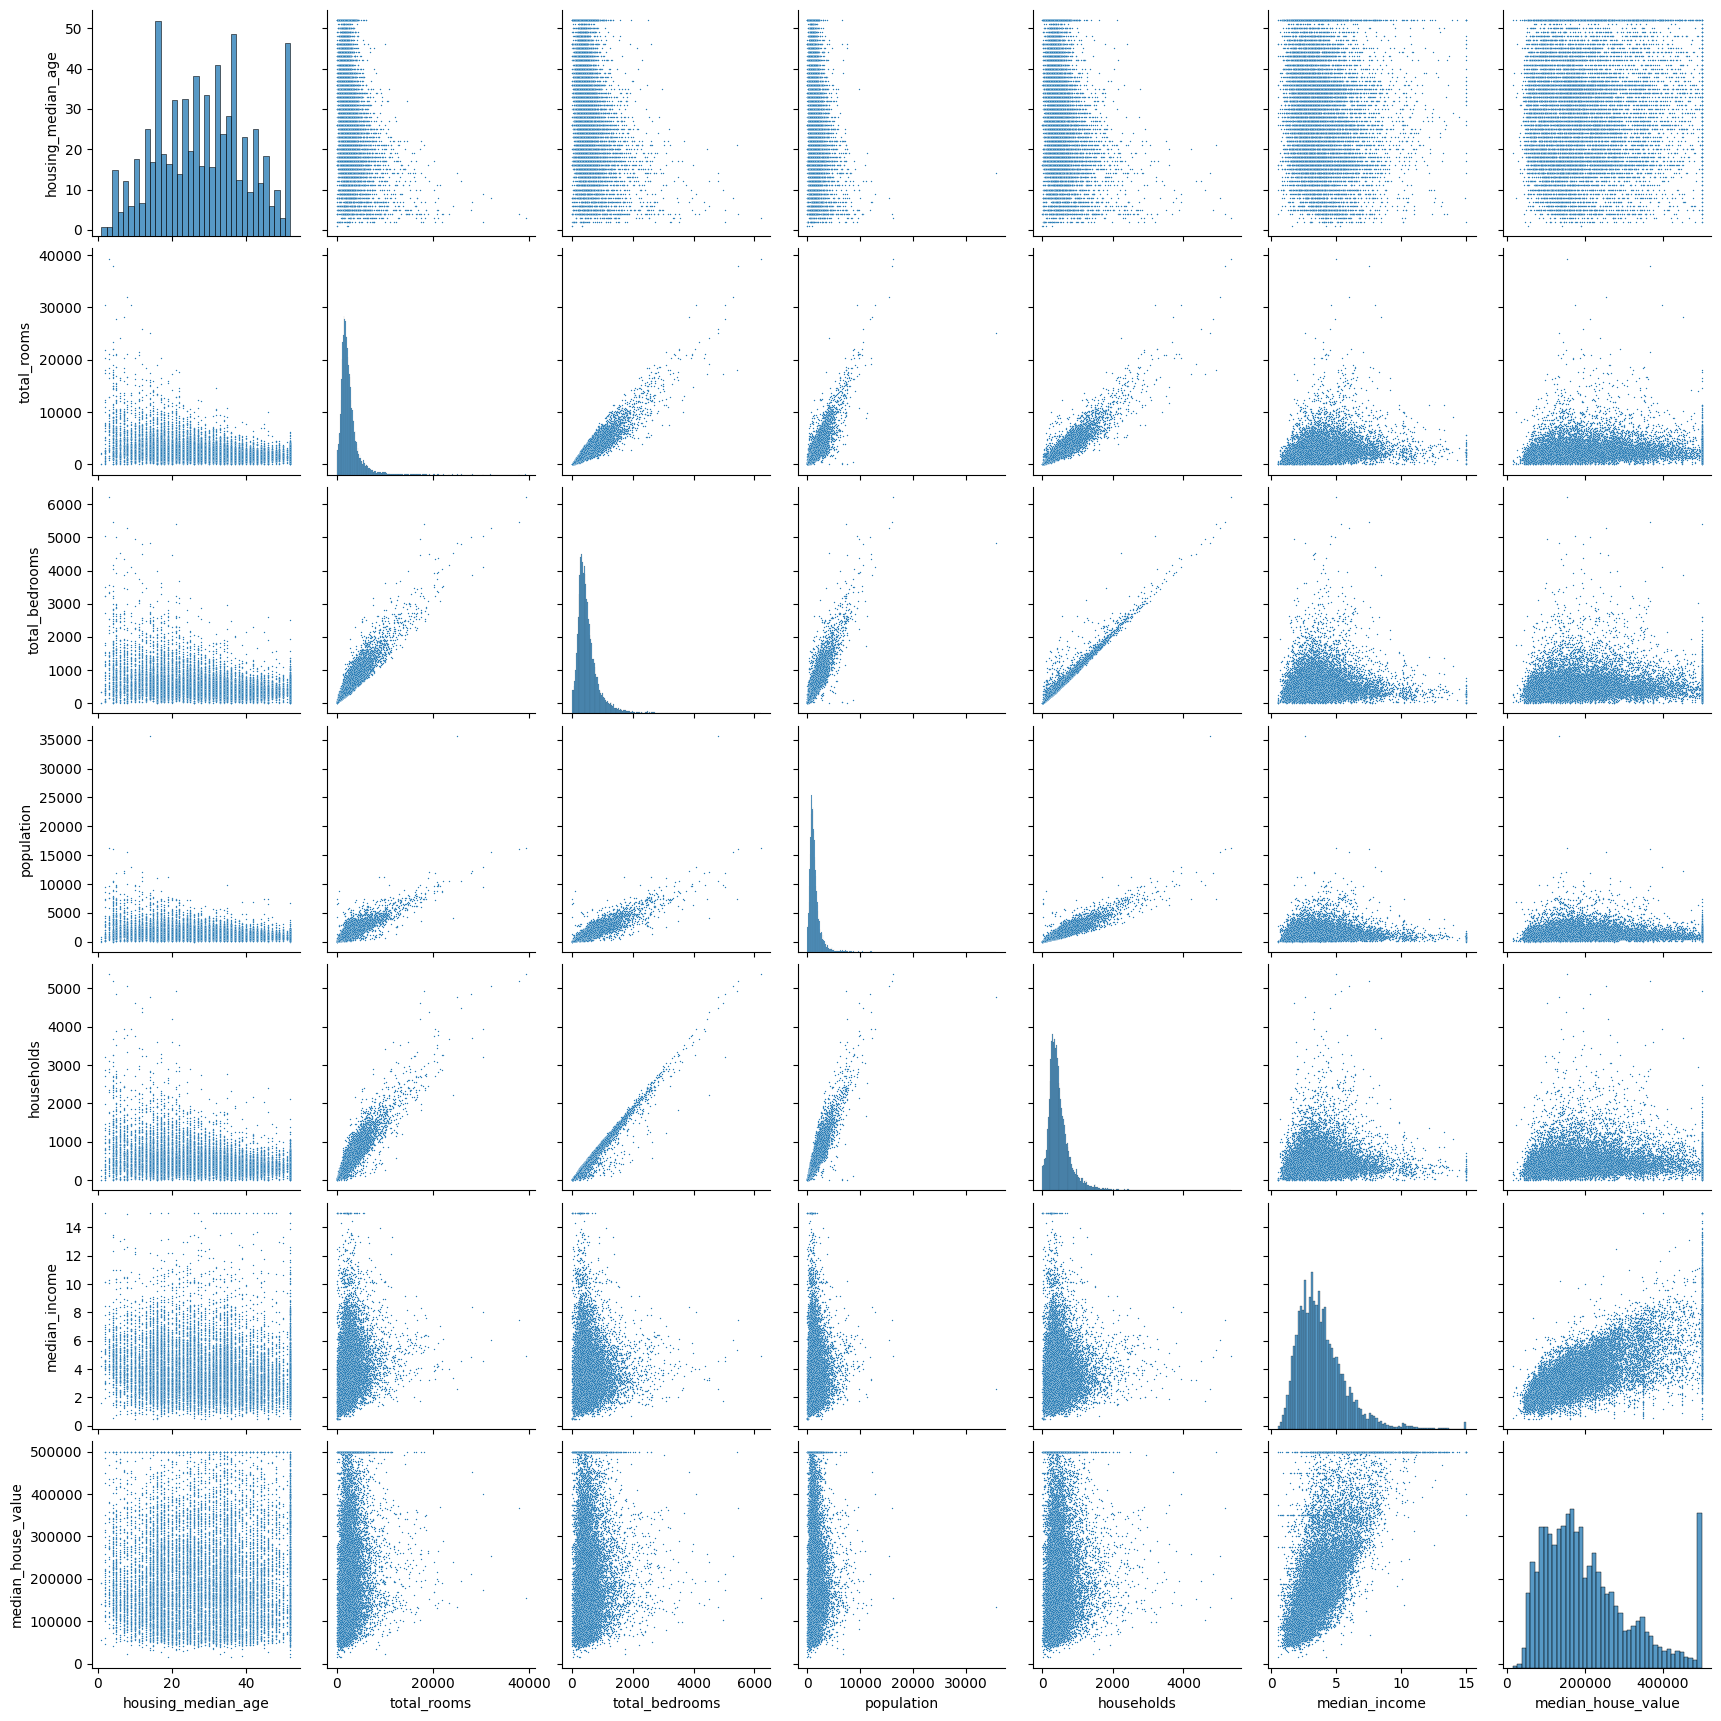

In [ ]:
sns.pairplot(df_train[plot_scatter], plot_kws={'s': 1})
plt.show()

**It makes sense that total bedrooms↑ => total rooms ↑ and households↑ => population↑.**

**See each of them individually.**

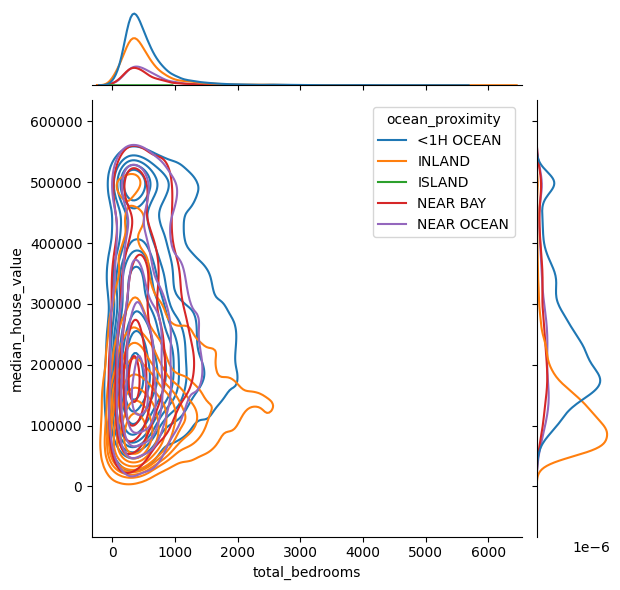

In [ ]:
import seaborn as sns
sns.jointplot(data=df_train, x="total_bedrooms", y="median_house_value", hue="ocean_proximity", kind="kde")
plt.show()

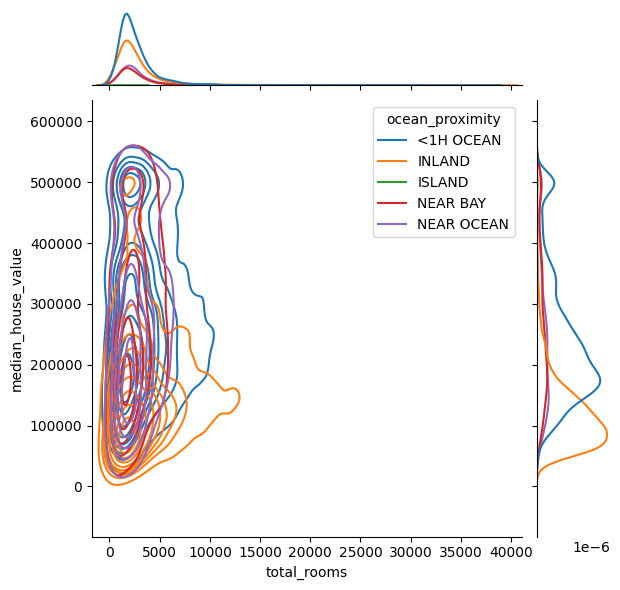

In [ ]:
sns.jointplot(data=df_train, x="total_rooms", y="median_house_value", hue="ocean_proximity", kind="kde")
plt.show()

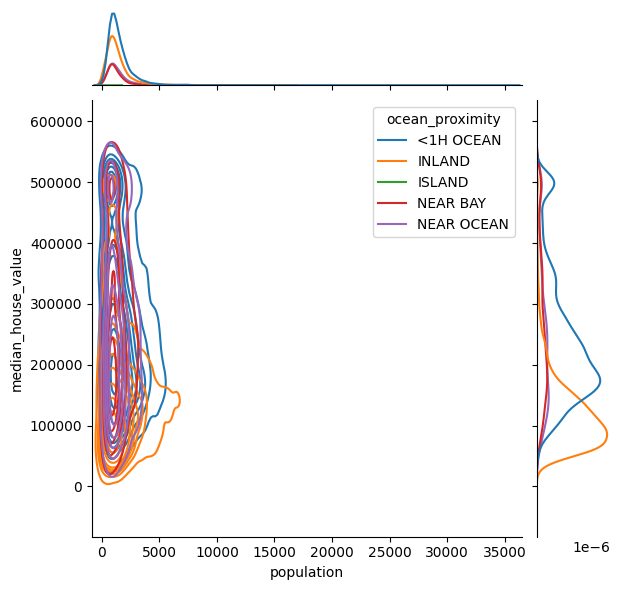

In [ ]:
sns.jointplot(data=df_train, x="population", y="median_house_value", hue="ocean_proximity", kind="kde")
plt.show()

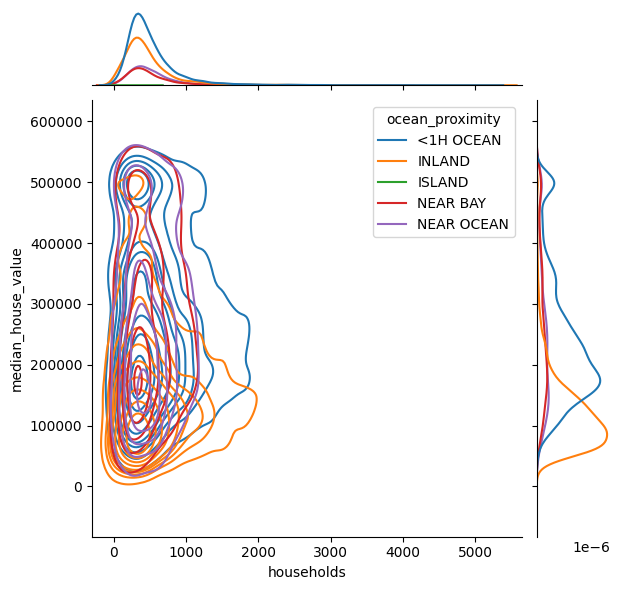

In [ ]:
sns.jointplot(data=df_train, x="households", y="median_house_value", hue="ocean_proximity", kind="kde")
plt.show()

**The distributions of these variables are very close. Therefore, I consider selecting 'total rooms' due to its high correlation, and choose 'population' because it reflects macro-level data.**

**Train baseline XGBoost model.**

In [ ]:
X_s = df_train.drop(['median_house_value', 'total_bedrooms', 'households'], axis=1)
y_s = df_train['median_house_value']

In [ ]:
print(X_s['ocean_proximity'].unique())
X_s_d = pd.get_dummies(X_s, columns=['ocean_proximity'], drop_first=True)

['NEAR BAY', 'INLAND', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


In [ ]:
from sklearn.preprocessing import StandardScaler
model_scale = StandardScaler()
X_s_d_scaled = model_scale.fit_transform(X_s_d)
y_s_log = np.log(y_s)

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('regressor', XGBRegressor())])

search_space = {
    "regressor__n_estimators": [500],
    "regressor__max_depth": [3, 6, 9],
    "regressor__gamma": [0.01, 0.1],
    "regressor__learning_rate": [0.1],
    "regressor__subsample": [0.8, 1.0],
    "regressor__colsample_bytree": [0.8],
    "regressor__min_child_weight": [1, 3, 5],
    "regressor__reg_alpha": [0.1, 0.5],
    "regressor__reg_lambda": [0.1, 0.3]
}



GS = GridSearchCV(estimator=pipeline, param_grid=search_space, scoring=["r2", "neg_root_mean_squared_error"],
refit="neg_root_mean_squared_error", cv=3, verbose=3)

GS.fit(X_s_d_scaled, y_s_log)


best_params = GS.best_params_
best_estimator = GS.best_estimator_
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3] END regressor__colsample_bytree=0.8, regressor__gamma=0.01, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__min_child_weight=1, regressor__n_estimators=500, regressor__reg_alpha=0.1, regressor__reg_lambda=0.1, regressor__subsample=0.8; neg_root_mean_squared_error: (test=-0.237) r2: (test=0.829) total time=   0.5s
[CV 2/3] END regressor__colsample_bytree=0.8, regressor__gamma=0.01, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__min_child_weight=1, regressor__n_estimators=500, regressor__reg_alpha=0.1, regressor__reg_lambda=0.1, regressor__subsample=0.8; neg_root_mean_squared_error: (test=-0.234) r2: (test=0.828) total time=   0.4s
[CV 3/3] END regressor__colsample_bytree=0.8, regressor__gamma=0.01, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__min_child_weight=1, regressor__n_estimators=500, regressor__reg_alpha=0.1, regressor__reg_lambda=0.1, regressor__subsampl

In [ ]:
best_r2 = GS.cv_results_['mean_test_r2'][GS.best_index_]
best_rmse = -GS.best_score_

print("Best R^2 Score:", best_r2)
print("Best RMSE Score:", best_rmse)

Best R^2 Score: 0.847527696703677
Best RMSE Score: 0.22175061206022897


**To understand the importance of each feature, utilize feature selection techniques.**

In [ ]:
pd.DataFrame({'features':X_s_d.columns,
              'feature_importances':best_estimator.named_steps['regressor'].feature_importances_}).sort_values('feature_importances', ascending=False)

,features,feature_importances
6,ocean_proximity_INLAND,0.767350
5,median_income,0.098543
0,longitude,0.029878
1,latitude,0.027894
9,ocean_proximity_NEAR OCEAN,0.026648
3,total_rooms,0.012482
8,ocean_proximity_NEAR BAY,0.012098
2,housing_median_age,0.011810
4,population,0.011770
7,ocean_proximity_ISLAND,0.001527


**The feature 'ocean_proximity_ISLAND' has the least impact due to the lack of observations.**



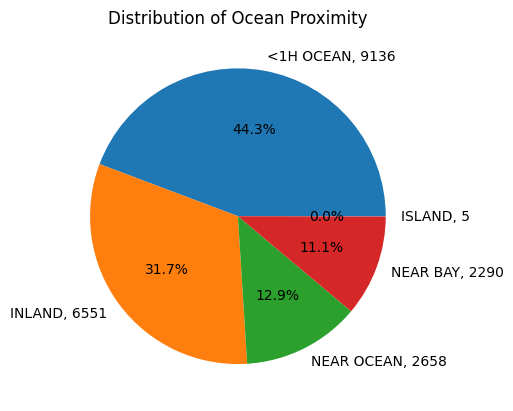

In [ ]:
value_counts = data['ocean_proximity'].value_counts()

labels = [f'{index}, {count}' for index, count in value_counts.items()]

plt.pie(value_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Ocean Proximity')
plt.show()

**There are only 5 observations.**

**Test on unseen data.**

In [ ]:
X_unseen = df_test.drop(['median_house_value', 'households', 'total_bedrooms'], axis = 1)
y_unseen = np.log(df_test['median_house_value'])
X_unseen_d = pd.get_dummies(X_unseen, drop_first=True)

In [ ]:
predictions = best_estimator.predict(model_scale.transform(X_unseen_d))


r2_unseen = best_estimator.score(model_scale.transform(X_unseen_d), y_unseen)
rmse_unseen = mean_squared_error(y_unseen, predictions, squared=False)
print("R^2 on Unseen Data:", r2_unseen)
print("RMSE on Unseen Data:", rmse_unseen)

R^2 on Unseen Data: 0.8530729645014938
RMSE on Unseen Data: 0.21983118


**Baseline RMSE is 0.219.**

**As histogram in the label, we see strange outliers in the label data, I have decided to analyze them and might try dropping them to see whether the model can perform better."**

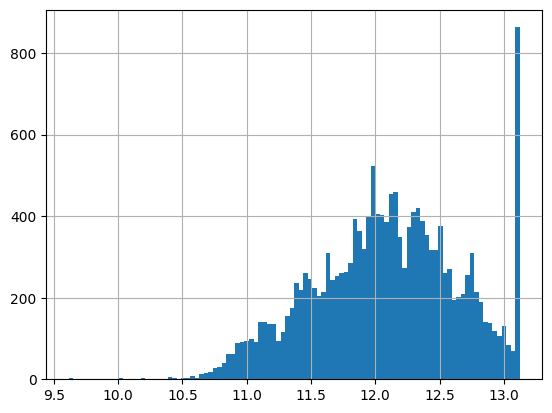

In [ ]:
np.log(df_train['median_house_value']).hist(bins = 100)
plt.show()

In [ ]:
df_train[df_train['median_house_value'] >= 500001]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5728,-118.209999,34.180000,14.0,2672.0,335.0,1113.0,318.0,12.1579,<1H OCEAN,500001.0
18081,-122.029999,37.270000,25.0,4460.0,553.0,1608.0,561.0,10.7958,<1H OCEAN,500001.0
8805,-118.339996,33.759998,34.0,5586.0,674.0,1871.0,636.0,15.0001,NEAR OCEAN,500001.0
20335,-118.940002,34.240002,5.0,10018.0,1233.0,4253.0,1120.0,8.9063,<1H OCEAN,500001.0
8304,-118.120003,33.750000,47.0,3330.0,569.0,1220.0,557.0,7.3672,NEAR OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
15639,-122.419998,37.799999,52.0,2797.0,685.0,1156.0,651.0,4.3472,NEAR BAY,500001.0
4074,-118.430000,34.139999,44.0,1693.0,239.0,498.0,216.0,10.9237,<1H OCEAN,500001.0
18272,-122.089996,37.360001,37.0,2269.0,325.0,930.0,321.0,7.5274,NEAR BAY,500001.0
16946,-122.330002,37.549999,33.0,2199.0,312.0,827.0,319.0,6.1349,NEAR OCEAN,500001.0


In [ ]:
df_train[df_train['median_house_value'] == 500001]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5728,-118.209999,34.180000,14.0,2672.0,335.0,1113.0,318.0,12.1579,<1H OCEAN,500001.0
18081,-122.029999,37.270000,25.0,4460.0,553.0,1608.0,561.0,10.7958,<1H OCEAN,500001.0
8805,-118.339996,33.759998,34.0,5586.0,674.0,1871.0,636.0,15.0001,NEAR OCEAN,500001.0
20335,-118.940002,34.240002,5.0,10018.0,1233.0,4253.0,1120.0,8.9063,<1H OCEAN,500001.0
8304,-118.120003,33.750000,47.0,3330.0,569.0,1220.0,557.0,7.3672,NEAR OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
15639,-122.419998,37.799999,52.0,2797.0,685.0,1156.0,651.0,4.3472,NEAR BAY,500001.0
4074,-118.430000,34.139999,44.0,1693.0,239.0,498.0,216.0,10.9237,<1H OCEAN,500001.0
18272,-122.089996,37.360001,37.0,2269.0,325.0,930.0,321.0,7.5274,NEAR BAY,500001.0
16946,-122.330002,37.549999,33.0,2199.0,312.0,827.0,319.0,6.1349,NEAR OCEAN,500001.0


**>= 500001 and == 500001 have the same 783 rows, so it is the maximum median.**

**Try to drop it.**

In [ ]:
df_outlier = df_train[(df_train['median_house_value'] >= 500001)]
df_no_outlier = df_train[~(df_train['median_house_value'] >= 500001)]

**Train no outlier data on XGBoost model.**

In [ ]:
def run_model(train, test, col = []):

  X = train.drop('median_house_value', axis = 1)
  y = train['median_house_value']

  if col is not None:
    col_list = col
    X = X.drop(col_list, axis = 1)

  X_d = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

  model = StandardScaler()
  X_scaled = model.fit_transform(X_d)
  y_scaled = np.log(y)

  pipeline = Pipeline([('regressor', XGBRegressor())])

  search_space = {
    "regressor__n_estimators": [500],
    "regressor__max_depth": [3, 6, 9],
    "regressor__gamma": [0.01, 0.1],
    "regressor__learning_rate": [0.1],
    "regressor__subsample": [0.8, 1.0],
    "regressor__colsample_bytree": [0.8],
    "regressor__min_child_weight": [1, 3, 5],
    "regressor__reg_alpha": [0.1, 0.5],
    "regressor__reg_lambda": [0.1, 0.3]}

  GS = GridSearchCV(estimator=pipeline, param_grid=search_space, scoring=["r2", "neg_root_mean_squared_error"],
                    refit="neg_root_mean_squared_error", cv=3, verbose=3)

  GS.fit(X_scaled, y_scaled)


  best_params = GS.best_params_
  best_estimator = GS.best_estimator_
  print("Best Parameters:", best_params)
  print("Best Estimator:", best_estimator)


  pd.DataFrame({'features':X_d.columns,
              'feature_importances':best_estimator.named_steps['regressor'].feature_importances_}).sort_values('feature_importances', ascending=False).head()


  X_u = test.drop('median_house_value', axis = 1)
  y_u = np.log(test['median_house_value'])
  if col is not None:
    col_list = col
    X_u = X_u.drop(col_list, axis = 1)

  X_u_d = pd.get_dummies(X_u, drop_first=True)


  predictions = best_estimator.predict(model.transform(X_u_d))
  r2_unseen = best_estimator.score(model.transform(X_u_d), y_u)
  rmse_unseen = mean_squared_error(y_u, predictions, squared=False)


  print("R^2 on Unseen Data:", r2_unseen)
  print("RMSE on Unseen Data:", rmse_unseen)

  return best_estimator

**Without dropping any features.**

In [ ]:
run_model(df_no_outlier, df_test)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3] END regressor__colsample_bytree=0.8, regressor__gamma=0.01, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__min_child_weight=1, regressor__n_estimators=500, regressor__reg_alpha=0.1, regressor__reg_lambda=0.1, regressor__subsample=0.8; neg_root_mean_squared_error: (test=-0.234) r2: (test=0.808) total time=   0.6s
[CV 2/3] END regressor__colsample_bytree=0.8, regressor__gamma=0.01, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__min_child_weight=1, regressor__n_estimators=500, regressor__reg_alpha=0.1, regressor__reg_lambda=0.1, regressor__subsample=0.8; neg_root_mean_squared_error: (test=-0.230) r2: (test=0.811) total time=   0.6s
[CV 3/3] END regressor__colsample_bytree=0.8, regressor__gamma=0.01, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__min_child_weight=1, regressor__n_estimators=500, regressor__reg_alpha=0.1, regressor__reg_lambda=0.1, regressor__subsampl

Pipeline(steps=[('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0.01, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None, min_child_weight=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=500,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, ...))])

**The RMSE for the data without outliers and without dropping any features is 0.218.**

**Drop total bedrooms and households.**

In [ ]:
run_model(df_no_outlier, df_test, ['total_bedrooms', 'households'])

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3] END regressor__colsample_bytree=0.8, regressor__gamma=0.01, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__min_child_weight=1, regressor__n_estimators=500, regressor__reg_alpha=0.1, regressor__reg_lambda=0.1, regressor__subsample=0.8; neg_root_mean_squared_error: (test=-0.232) r2: (test=0.811) total time=   0.4s
[CV 2/3] END regressor__colsample_bytree=0.8, regressor__gamma=0.01, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__min_child_weight=1, regressor__n_estimators=500, regressor__reg_alpha=0.1, regressor__reg_lambda=0.1, regressor__subsample=0.8; neg_root_mean_squared_error: (test=-0.229) r2: (test=0.813) total time=   2.0s
[CV 3/3] END regressor__colsample_bytree=0.8, regressor__gamma=0.01, regressor__learning_rate=0.1, regressor__max_depth=3, regressor__min_child_weight=1, regressor__n_estimators=500, regressor__reg_alpha=0.1, regressor__reg_lambda=0.1, regressor__subsampl

Pipeline(steps=[('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0.01, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None, min_child_weight=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=500,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, ...))])

**The RMSE for the data without outliers, but dropping total bedrooms and households. is 0.218.**

**Result**

**1) The RMSE for baseline is 0.219.**

**2) The RMSE for the data without outliers and without dropping any features is 0.218.**

**3) The RMSE for the data without outliers, but dropping total bedrooms and households. is 0.218.**

**It performs almost the same as not dropping outlier.**

**Plot to see why.**

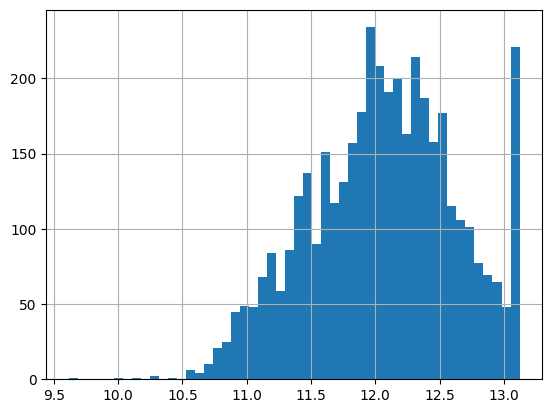

In [ ]:
np.log(df_test['median_house_value']).hist(bins = 50)
plt.show()

**The 'median house value' of the unseen data distributes the same way as the training set. Therefore, it is not caused by unseen data that might not have outliers.**

**Plot to see why based on 'longitude' and 'latitude'.**

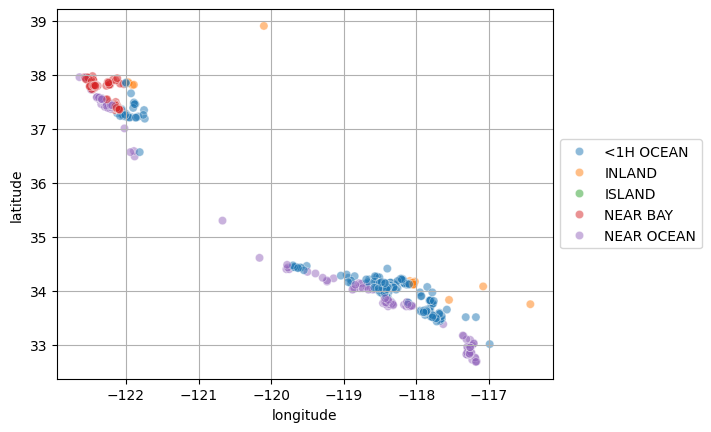

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.grid(True)
sns.scatterplot(data=df_outlier, x='longitude', y='latitude', alpha = 0.5, hue='ocean_proximity')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

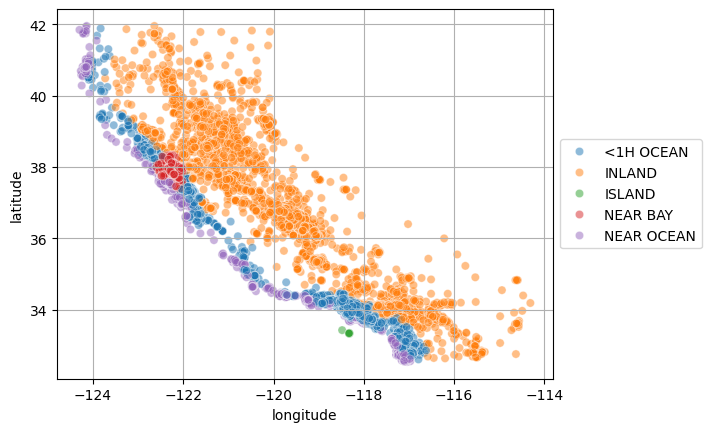

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.grid(True)
sns.scatterplot(data=df_no_outlier, x='longitude', y='latitude', alpha = 0.5, hue='ocean_proximity')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**It is the case that outlier data can cause issues with normality. However, it can also assist in classifying whether a house is located inland or not. This is because it is rare to observe a median price of $500,001 within the 'inland' category. Therefore, it should not be dropped.**